# Assignment

### 1. Print Relative Frequency of State and plot it
### 2. Print Relative Frequency of City and plot it
### 3. Group the Email based on personal and other categories

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
from pprint import pprint

In [95]:
df = pd.read_excel("data/nbfc_public_deposits.xlsx", skiprows=2)

In [96]:
# we can drop the first column
df.columns[0]

'Unnamed: 0'

In [97]:
# dropped it
df = df.drop(columns=df.columns[0])

In [98]:
df.columns

Index(['S No', 'Name of the company', 'Regional Office', 'Address 1',
       'Address 2', 'Address 3', 'City', 'State', 'Pincode', 'Email', 'Fax'],
      dtype='object')

In [99]:
df.set_index('S No', inplace=True)

In [100]:
df.head()

,Name of the company,Regional Office,Address 1,Address 2,Address 3,City,State,Pincode,Email,Fax
S No,,,,,,,,,,
1,ARMAN FINANCIAL SERVICES LIMITED,Ahmedabad,"501-504,Sakar III",Opp . Old High Court,Off. Ashram Road,Ahmedabad,Gujarat,380014,finance@armanindia.com website:www.armanind...,079 -27543666
2,Chinmay Finlease Ltd,Ahmedabad,Azad Chowk,NaN,Dist: Banaskantha(Ng),Bhabhar,Gujarat,385320,Yogesh.majithia@gmail.com,02735-222481
3,Ishan Finlease Limited,Ahmedabad,"608-609, Pratiksha Complex","Mahalaxmi Panch Rasta,","Near Paldi Cross Road, Paldi",Ahmedabad,Gujarat,380007,contactifpl@gmail.com,NaN
4,JAYLAKSHMI CREDIT COMPANY LIMITED,Ahmedabad,"3/209, Ghanchi Sheri",Navapura,NaN,Surat,Gujarat,395003,smn_kadoli@yahoo.com,0261-2431085
5,K.Z. Leasing & Finance Ltd,Ahmedabad,"1st Floor,Deshna Chambers",B/H Kadva Patidar Vadi,"Usmanpura , Ashram Road",Ahmedabad,Gujarat,380014,kzleasing@yahoo.com,NaN


In [101]:
df.shape

(81, 10)

#### Print Relative Frequency of State and plot it

In [102]:
# visualising and cleaning the data accordingly

print(df['State'].to_string())

S No
1               Gujarat
2               Gujarat
3               Gujarat
4               Gujarat
5               Gujarat
6               Gujarat
7               Gujarat
8             Karnataka
9                   NaN
10               Punjab
11               Punjab
12               Punjab
13               Punjab
14               Punjab
15               Punjab
16               Punjab
17               Punjab
18               Punjab
19               Punjab
20               Punjab
21               Punjab
22           Chandigarh
23           TAMIL NADU
24           TAMIL NADU
25            TAMILNADU
26           TAMIL NADU
27           TAMIL NADU
28           Tamil Nadu
29           Tamil Nadu
30           TAMIL NADU
31           TAMIL NADU
32           TAMIL NADU
33           TAMIL NADU
34           TAMIL NADU
35           Tamil nadu
36           TAMIL NADU
37           TAMIL NADU
38           TAMIL NADU
39           TAMIL NADU
40           TAMIL NADU
41           TAMIL NADU
42         

In [129]:
df_state = df['State']

In [106]:
count_nan = len(df_state) - df_state.count()
print(count_nan)

10


In [107]:
# dropping NaN values, see the results above and below 
df_state.dropna(axis=0, inplace=True)

In [229]:
count_nan = len(df_state) - df_state.count()
print(count_nan)

0


In [132]:
print(df_state.unique())

['Gujarat' 'Karnataka' 'Punjab' 'Chandigarh' 'TAMIL NADU' 'TAMILNADU'
 'Tamil Nadu' 'Tamil nadu' 'Jammu and Kashmir' 'Jammu & Kashmir'
 'Uttar Pradesh' 'West Bengal' 'Maharashtra' 'New Delhi' 'Haryana' 'Delhi'
 'Bihar' 'Kerala']


In [230]:
# We have similar names here, we can clean it too.

In [231]:
def replaceStateName(item):
    if(item.lower().startswith('tamil')):
        return 'Tamil Nadu'
    elif('jammu' in item.lower()):
        return 'Jammu and Kashmir'
    elif('delhi' in item.lower()):
        return 'Delhi'
    else:
        return item

In [233]:
df_state = df_state.apply(replaceStateName)
print(df_state.unique())
# As you can see now the list is cleaned and doesnot contains the same name and no nan's

['Gujarat' 'Karnataka' 'Punjab' 'Chandigarh' 'Tamil Nadu'
 'Jammu and Kashmir' 'Uttar Pradesh' 'West Bengal' 'Maharashtra' 'Delhi'
 'Haryana' 'Bihar' 'Kerala']


In [234]:
# Now we can calculate the frequency of the names
state_dict = df_state.value_counts()
print(state_dict)

Tamil Nadu           22
Punjab               12
Delhi                 8
Gujarat               7
Uttar Pradesh         6
Jammu and Kashmir     5
Kerala                4
Bihar                 2
Karnataka             1
Chandigarh            1
Maharashtra           1
Haryana               1
West Bengal           1
Name: State, dtype: int64


In [235]:
state_names = list(state_dict.index.values)
state_frequencies = list(state_dict.values)

In [236]:
print(state_names)
print(state_frequencies)

['Tamil Nadu', 'Punjab', 'Delhi', 'Gujarat', 'Uttar Pradesh', 'Jammu and Kashmir', 'Kerala', 'Bihar', 'Karnataka', 'Chandigarh', 'Maharashtra', 'Haryana', 'West Bengal']
[22, 12, 8, 7, 6, 5, 4, 2, 1, 1, 1, 1, 1]


Text(0.5, 0, 'State Name')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Frequency of states visited')

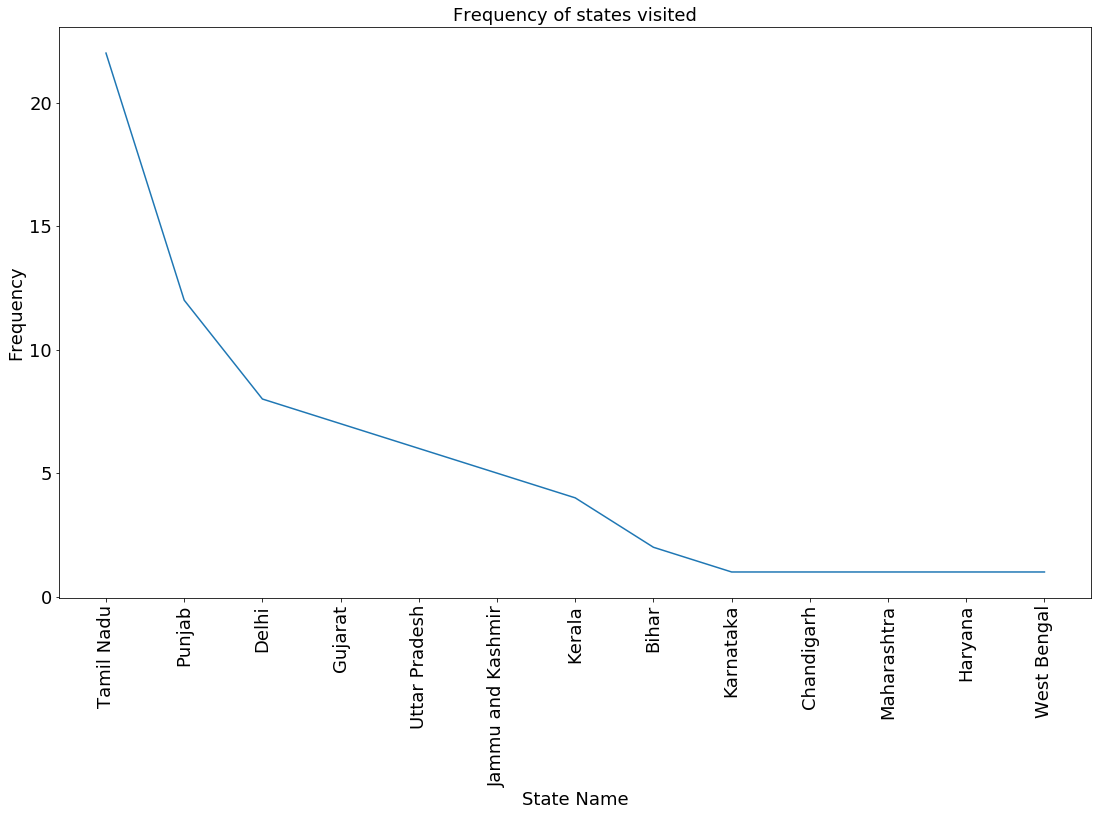

In [260]:
# Showing the data on the graph

fig = plt.figure()

fig.set_size_inches(18.5, 10.5)

plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

plt.plot(State_Name, State_Freq)

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
plt.xlabel('State Name', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Frequency of states visited', fontsize=18)

## 2. Print Relative Frequency of City and plot it

In [246]:
# Following the same procedure for the city

df_city = df['City']

# dropping NaN values, see the results above and below 
df_city.dropna(axis=0, inplace=True)

# We have similar names here, we can clean it too.


In [248]:
print(df_city.to_string())

S No
1                Ahmedabad
2                  Bhabhar
3                Ahmedabad
4                    Surat
5                Ahmedabad
6                   Rajkot
7                   Rajkot
8                Bangalore
9                  Dharwad
10               Jalandhar
11                Ludhiana
12               Jalandhar
13                  Khanna
14               Jalandhar
15                Ludhiana
16               Jalandhar
17                Amritsar
18                    Moga
19               Jalandhar
20               Jalandhar
21               Jalandhar
22              Chandigarh
23                 Chennai
24                 Chennai
25                 CHENNAI
26                 Chennai
27                 Chennai
28                   Salem
29                 Chennai
30                 Chennai
31                   Karur
32                 Chennai
33              Coimbatore
34             Tirunelveli
35                 Chennai
36                 CHENNAI
37                   Sa

In [249]:
def replaceCityName(item):
    if('delhi' in item.lower()):
        return 'Delhi'
    else:
        return item

In [250]:

df_city = df_city.apply(replaceCityName)
print(df_city.unique())
# As you can see now the list is cleaned and doesnot contains the same name and no nan's


['Ahmedabad' 'Bhabhar' 'Surat' 'Rajkot' 'Bangalore' 'Dharwad' 'Jalandhar'
 'Ludhiana' 'Khanna' 'Amritsar' 'Moga' 'Chandigarh' 'Chennai' 'CHENNAI'
 'Salem' 'Karur' 'Coimbatore' 'Tirunelveli' 'Namakkal' 'Jammu' 'Badaun'
 'Pilibhit' 'Bijnor' 'Meerut' 'Allahabad' 'Bareilly' 'Kolkata' 'Pune'
 'Nagpur' 'Mumbai' 'Navapur' 'Rohtak, Haryana' 'Delhi' 'GURGAON'
 'SAMASTIPUR' 'Patna' 'Thiruvananthapuram' 'Kerala' 'Kochi']


Chennai               14
Delhi                 11
Jalandhar              7
Jammu                  6
Ahmedabad              3
Rajkot                 2
Kochi                  2
Ludhiana               2
Mumbai                 2
CHENNAI                2
Salem                  2
Meerut                 1
Tirunelveli            1
Bangalore              1
Bhabhar                1
Khanna                 1
Chandigarh             1
Namakkal               1
Allahabad              1
Thiruvananthapuram     1
Bareilly               1
Kerala                 1
Navapur                1
SAMASTIPUR             1
Nagpur                 1
Karur                  1
Moga                   1
Patna                  1
Amritsar               1
GURGAON                1
Badaun                 1
Coimbatore             1
Dharwad                1
Kolkata                1
Rohtak, Haryana        1
Pune                   1
Bijnor                 1
Surat                  1
Pilibhit               1
Name: City, dtype: int64


Text(0.5, 0, 'City Name')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Frequency of cities visited')

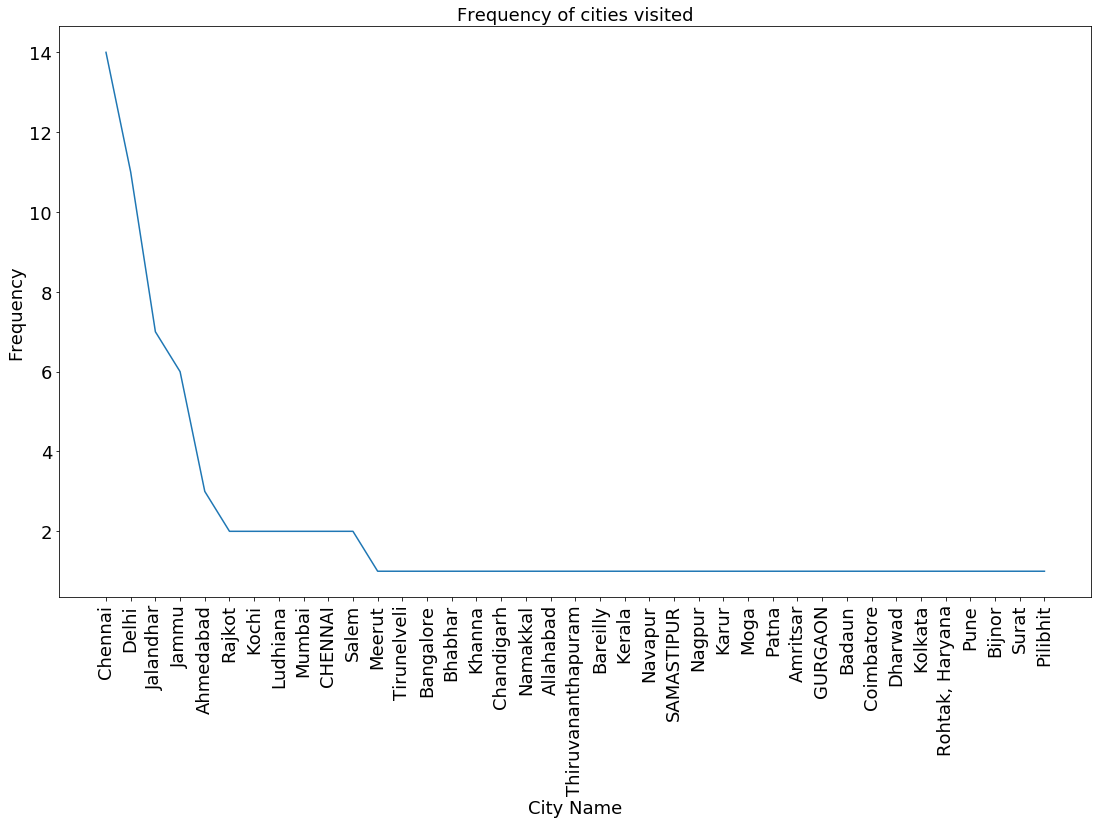

In [263]:
# Now we can calculate the frequency of the names
city_dict = df_city.value_counts()

print(city_dict)

city_names = list(city_dict.index.values)
city_frequencies = list(city_dict.values)

# Showing the data on the graph

fig = plt.figure()

fig.set_size_inches(18.5, 10.5)

plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

plt.plot(city_names, city_frequencies)

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(90)
    
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Frequency of cities visited',fontsize=18)



### 3. Group the Email based on personal and other categories

In [290]:
df['Email'].head()

S No
1    finance@armanindia.com    website:www.armanind...
2                            Yogesh.majithia@gmail.com
3                                contactifpl@gmail.com
4                                 smn_kadoli@yahoo.com
5                                  kzleasing@yahoo.com
Name: Email, dtype: object

In [279]:
df_email = df['Email']
df_email.head()
print(type(df_email))

S No
1    finance@armanindia.com    website:www.armanind...
2                            Yogesh.majithia@gmail.com
3                                contactifpl@gmail.com
4                                 smn_kadoli@yahoo.com
5                                  kzleasing@yahoo.com
Name: Email, dtype: object

<class 'pandas.core.series.Series'>


In [294]:
df_email.dropna(axis=0, inplace=True)
np_email = df_email.values
print(type(np_email))

<class 'numpy.ndarray'>


In [298]:
def getAllEmail(text):
    return re.findall('[\w\.-]+@[\w\.-]+', text)

In [303]:
# This was done with multiple for, otherwise we could have gone with flatmap
emails = []
for text in np_email:
    list_emails = getAllEmail(text)
    for email in list_emails:
        emails.append(email.lower())

In [304]:
emails

['finance@armanindia.com',
 'yogesh.majithia@gmail.com',
 'contactifpl@gmail.com',
 'smn_kadoli@yahoo.com',
 'kzleasing@yahoo.com',
 'northpolefinanceltd@hotmail.com',
 'rajathfin@hotmail.com',
 'investorrelation-rajath@hotmail.com',
 'chemmfinance@chemmnur.com',
 'veenachemmfinance@gmail.com',
 'deshpandepublicity@gmail.com',
 'trikaalfinance@gmail.com',
 'ashwaninahar@gmail.com',
 'casatprakash@yahoo.cin',
 'amcgroup@amritmalwacapital.com',
 'bpdfinance@aol.in',
 'prince_dhamija@yahoo.com',
 'ekjotadvances@gmail.com',
 'jcajalandhar@hotmail.com',
 'openupharvinder@siffy.com',
 'ssheera@nnfl.in',
 'phf_leasingltd@yahoo.co.in',
 'rakeshgupta@pkffinance.com',
 'aloksondhi@pkffinance.com',
 'deccanfinance@gmail.com',
 'anil.sharma@fullertonindia.com',
 'galadafinancelimited@yahoo.co.in',
 'goveaccts@vstmotors.com',
 'gtpfinanceltd@gmail.com',
 'gmfin@indoasiafin.com',
 'ifcl_hoo@satyam.net.in',
 'gayathirifinltd@dataone.in',
 'gayathiriltd@gmail.com',
 'newlin.nofl@gmail.com',
 'sakthif_

In [307]:
personal_categories_mail = ["gmail.com", "sify.com", "yahoo.com", "yahoo.co.in", "hotmail.com", "rediffmail.com"]

In [314]:
personal_emails = []
private_emails = []

for email in emails:
    if(email.split("@")[1] in personal_categories_mail):
        personal_emails.append(email)
    else:
        private_emails.append(email)
        
        
pprint(personal_emails)
print("\n\n\n")
pprint(private_emails)

['yogesh.majithia@gmail.com',
 'contactifpl@gmail.com',
 'smn_kadoli@yahoo.com',
 'kzleasing@yahoo.com',
 'northpolefinanceltd@hotmail.com',
 'rajathfin@hotmail.com',
 'investorrelation-rajath@hotmail.com',
 'veenachemmfinance@gmail.com',
 'deshpandepublicity@gmail.com',
 'trikaalfinance@gmail.com',
 'ashwaninahar@gmail.com',
 'prince_dhamija@yahoo.com',
 'ekjotadvances@gmail.com',
 'jcajalandhar@hotmail.com',
 'phf_leasingltd@yahoo.co.in',
 'deccanfinance@gmail.com',
 'galadafinancelimited@yahoo.co.in',
 'gtpfinanceltd@gmail.com',
 'gayathiriltd@gmail.com',
 'newlin.nofl@gmail.com',
 'vijayramhirepurchase@gmail.com',
 'sarunachalam@gmail.com',
 'tnpowerfinance@gmail.com',
 'mullaimurugesan@gmail.com',
 'saravananmpg@gmail.com',
 'jayabharath77@yahoo.co.in',
 'geeceeadvance@gmail.com',
 'neelgaganfinance20@gmail.com',
 'abhishekagarwal007@hotmail.com',
 'raj_varshney777@gmail.com',
 'dp_ag@rediffmail.com',
 'cmehra47@rediffmail.com',
 'bijnor@yahoo.com',
 'kanakinstalmentslimited@yahoo